## Predict Group Stage World Cup 2022 Match

In [1]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf

In [2]:
data = "dataset/"
df_internationalmatches = pd.read_csv(data + "Results International Matches.csv")
df_wcmatches = pd.read_csv(data + "Data Predict.csv")

print(df_internationalmatches.shape)
print(df_wcmatches.shape)

(553, 19)
(48, 17)


In [3]:
df_internationalmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_score,away_score,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2018-09-06,Germany,France,84,82,85,85,85,82,0,0,15,1,1561.0,1726.0,UEFA Nations League,Munich,Germany,False
1,2018-09-06,Wales,Republic of Ireland,82,75,71,74,77,75,4,1,19,29,1536.0,1484.0,UEFA Nations League,Cardiff,Wales,False
2,2018-09-06,Slovenia,Bulgaria,72,70,76,69,72,67,1,2,55,47,1392.0,1416.0,UEFA Nations League,Ljubljana,Slovenia,False
3,2018-09-06,Austria,Sweden,80,76,77,75,75,75,2,0,23,13,1502.0,1565.0,Friendly,Vienna,Austria,False
4,2018-09-06,Netherlands,Peru,79,80,80,77,80,75,2,1,17,20,1540.0,1535.0,Friendly,Amsterdam,Netherlands,False


In [4]:
df_wcmatches.head()

,date,home_team,away_team,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,tournament,city,country,neutral
0,2022-11-20,Qatar,Ecuador,73,74,71,76,71,75,50,44,1439.89,1464.39,FIFA World Cup,Al Khor,Qatar,False
1,2022-11-21,England,Iran,86,81,83,72,83,72,5,20,1728.47,1564.61,FIFA World Cup,Al Rayyan,Qatar,True
2,2022-11-21,Senegal,Netherlands,79,83,77,83,77,83,18,8,1584.38,1694.51,FIFA World Cup,Doha,Qatar,True
3,2022-11-21,United States,Wales,77,78,78,76,76,77,16,19,1627.48,1569.82,FIFA World Cup,Al Rayyan,Qatar,True
4,2022-11-22,Argentina,Saudi Arabia,85,71,83,72,83,71,3,51,1773.88,1437.78,FIFA World Cup,Lusail,Qatar,True


In [5]:
label = LabelEncoder()
ohc = OneHotEncoder()

In [6]:
ftr = []
for i in range(len(df_internationalmatches)):
    if df_internationalmatches.home_score[i] > df_internationalmatches.away_score[i]:
        ftr.append(0)
    elif df_internationalmatches.home_score[i] < df_internationalmatches.away_score[i]:
        ftr.append(2)
    else:
        ftr.append(1)
df_internationalmatches.neutral = label.fit_transform(df_internationalmatches.neutral)
df_internationalmatches['FTR'] = ftr

In [7]:
columns = ['FTR', 'home_score', 'away_score', 'home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']

df_internationalmatches = df_internationalmatches[columns]
df_internationalmatches.head()

,FTR,home_score,away_score,home_att,away_att,home_mid,away_mid,home_def,away_def,home_rank,away_rank,home_rankpoint,away_rankpoint,neutral
0,1,0,0,84,82,85,85,85,82,15,1,1561.0,1726.0,0
1,0,4,1,82,75,71,74,77,75,19,29,1536.0,1484.0,0
2,2,1,2,72,70,76,69,72,67,55,47,1392.0,1416.0,0
3,0,2,0,80,76,77,75,75,75,23,13,1502.0,1565.0,0
4,0,2,1,79,80,80,77,80,75,17,20,1540.0,1535.0,0


In [8]:
y_train_predict = ohc.fit_transform(df_internationalmatches['FTR'].to_numpy().reshape(-1,1)).toarray()
X_train = df_internationalmatches.iloc[:,3:].astype(float)

In [9]:
df_wcmatches.neutral = label.fit_transform(df_wcmatches.neutral)
X_test = df_wcmatches[['home_att', 'away_att', 'home_mid', 'away_mid', 'home_def', 'away_def', 'home_rank', 'away_rank', 'home_rankpoint', 'away_rankpoint', 'neutral']].astype(float)

In [10]:
def plot_graph_accuracy(history, accuracy):
    plt.plot(history.history[accuracy])
    plt.xlabel("Epochs")
    plt.ylabel(accuracy)
    plt.show()
    
def plot_graph_loss(history, loss):
    plt.plot(history.history[loss])
    plt.xlabel("Epochs")
    plt.ylabel(loss)
    plt.show()

### Model predict matches (Probability Home win, Draw, Away Win)

In [11]:
model = tf.keras.models.Sequential([
    # The model is still a secret until all World Cup matches are finished
    
    
    
    
    
    
])

In [12]:
model.compile(# Still secret
              
              
              )

history = model.fit(X_train, y_train_predict, batch_size=10, epochs=150)

Epoch 1/150
56/56 [==============================] - 3s 4ms/step - loss: 24.1596 - accuracy: 0.4430
Epoch 2/150
56/56 [==============================] - 0s 3ms/step - loss: 16.3848 - accuracy: 0.3996
Epoch 3/150
56/56 [==============================] - 0s 3ms/step - loss: 9.4822 - accuracy: 0.4340
Epoch 4/150
56/56 [==============================] - 0s 2ms/step - loss: 9.1397 - accuracy: 0.3942
Epoch 5/150
56/56 [==============================] - 0s 3ms/step - loss: 7.7601 - accuracy: 0.4467
Epoch 6/150
56/56 [==============================] - 0s 3ms/step - loss: 7.8125 - accuracy: 0.4159
Epoch 7/150
56/56 [==============================] - 0s 2ms/step - loss: 7.7009 - accuracy: 0.4051
Epoch 8/150
56/56 [==============================] - 0s 2ms/step - loss: 9.5413 - accuracy: 0.4430
Epoch 9/150
56/56 [==============================] - 0s 2ms/step - loss: 6.5106 - accuracy: 0.4376
Epoch 10/150
56/56 [==============================] - 0s 2ms/step - loss: 8.2408 - accuracy: 0.4141
Epoch 1

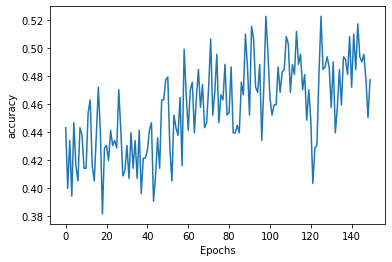

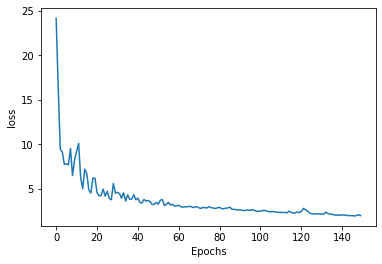

In [13]:
plot_graph_accuracy(history, 'accuracy')
plot_graph_loss(history, 'loss')

In [14]:
prob = model.predict(X_test)
print('Probability Result Group Stage World Cup 2022 Match')
print('===================================================')
for i in range(len(df_wcmatches)):
    print(f'{df_wcmatches.home_team[i]} vs {df_wcmatches.away_team[i]}')
    print(f'Home Win: {prob[i][0]:.5f}  Draw: {prob[i][1]:.5f}  Away Win: {prob[i][2]:.5f}\n')

Probability Result Group Stage World Cup 2022 Match
Qatar vs Ecuador
Home Win: 0.44955  Draw: 0.28349  Away Win: 0.26696

England vs Iran
Home Win: 0.68020  Draw: 0.18670  Away Win: 0.13310

Senegal vs Netherlands
Home Win: 0.26895  Draw: 0.36834  Away Win: 0.36271

United States vs Wales
Home Win: 0.51487  Draw: 0.25968  Away Win: 0.22546

Argentina vs Saudi Arabia
Home Win: 0.84768  Draw: 0.09780  Away Win: 0.05453

Denmark vs Tunisia
Home Win: 0.69579  Draw: 0.17714  Away Win: 0.12707

Mexico vs Poland
Home Win: 0.57451  Draw: 0.22986  Away Win: 0.19563

France vs Australia
Home Win: 0.80698  Draw: 0.12129  Away Win: 0.07173

Morocco vs Croatia
Home Win: 0.31830  Draw: 0.34259  Away Win: 0.33912

Germany vs Japan
Home Win: 0.58652  Draw: 0.22744  Away Win: 0.18604

Spain vs Costa Rica
Home Win: 0.75154  Draw: 0.15040  Away Win: 0.09806

Belgium vs Canada
Home Win: 0.84588  Draw: 0.09950  Away Win: 0.05462

Switzerland vs Cameroon
Home Win: 0.69996  Draw: 0.17258  Away Win: 0.12746

